In [1]:
import pandas as pd
import os
os.chdir(r"/Users/apple/Documents/Credit_Card_Churn_Model_Local/credit-card-churn/Input")

In [2]:
#Initialising Dataset

data = pd.read_csv("BankChurners.csv") 
data = data.drop(data.columns[-2:], axis=1)  
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
#Removing CLIENTNUM
data.drop(['CLIENTNUM'], axis=1, inplace=True) 
data.shape

(10127, 20)

In [4]:
#Unique Values and its frequency in categorical columns
columns = ['Attrition_Flag','Education_Level','Marital_Status','Income_Category','Card_Category',]
for col in columns:
    print(data[col].value_counts())


Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64


In [5]:
data['Attrition_Flag'] = data['Attrition_Flag'].map({ 
    'Attrited Customer': 1,
    'Existing Customer': 0})

In [6]:
data['Education_Level'] = data['Education_Level'].map({ 'Uneducated': 0,
    'High School': 1,
    'College': 2,
    'Graduate': 3,
    'Post-Graduate': 4,
    'Doctorate': 5,
    'Unknown': -1})

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
data['Gender'] = np.array(ct.fit_transform(data['Gender'].values.reshape(-1, 1)))


In [8]:
data['Income_Category'] = data['Income_Category'].map({ 
    'Less than $40K': 1,
    '$40K - $60K': 2,
    '$60K - $80K': 3,
    '$80K - $120K': 4,
    '$120K +': 5,
    'Unknown': -1})

In [9]:
data['Card_Category'] = data['Card_Category'].map({ 
    'Blue': 1,
    'Silver': 2,
    'Gold': 3,
    'Platinum': 4,
    'Unknown': -1})

In [10]:
#Usinng pandas converting Categorical variable to dummies
dummies = pd.get_dummies(data['Marital_Status'], drop_first=True)
dummies = dummies.astype(int)
dummies
# Concatenate the dummies with the original dataframe   
data = pd.concat([data, dummies], axis= 1)
# Drop the original 'Marital_Status' column
data.drop(['Marital_Status'], axis=1, inplace=True)


In [19]:
import os

# Get the directory of the input file
input_file = 'cleaned_credit_card_churn.csv'
output_file = 'cleaned_credit_card_churn_numeric.csv'
directory = os.path.dirname(input_file)

# Save the numeric data to the new file in the same directory
data.to_csv(os.path.join(directory, output_file), index=False)

<Axes: xlabel='Attrition_Flag', ylabel='count'>

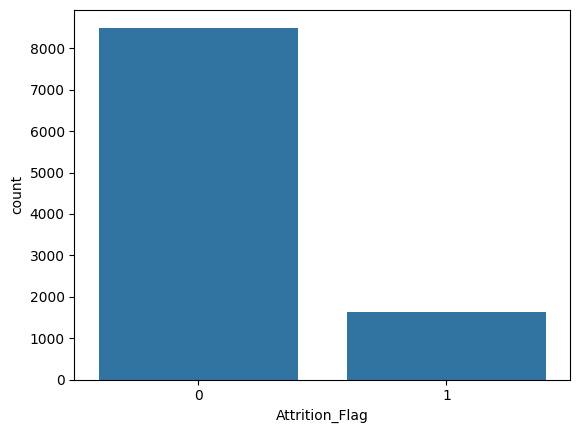

In [12]:
import seaborn as sns   
sns.countplot(x='Attrition_Flag', data=data)

<Axes: xlabel='Customer_Age'>

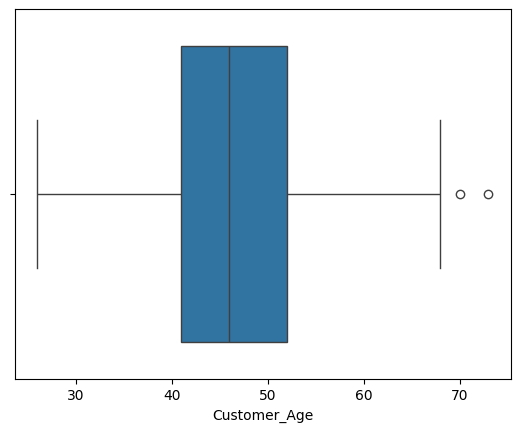

In [13]:
sns.boxplot(x='Customer_Age', data=data)

In [21]:
data['Gender'].describe()

count    10127.000000
mean         0.529081
std          0.499178
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Gender, dtype: float64